**A METHOD FOR SELECTING THE BEST LOCATION
FOR AFFORDABLE HOUSING IN CITIES TO
MINIMIZE THE NEGATIVE EFFECTS OF SPATIAL
INEQUALITY**

DEGREE DISTRIBUTION ANALYSIS FOR IKEJA, LAGOS

In [ ]:
# 1. Install required packages (only needed once)
!pip install -q osmnx networkx matplotlib

# 2. loading standard libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from pprint import pprint
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN
from sklearn.neighbors import sort_graph_by_row_values

#!uv pip install --system --quiet osmnx[all]
ox.__version__

'2.0.6'

In [ ]:
# 3. Load the street network graph from OpenStreetMap
place = "Ikeja, Lagos, Nigeria"
G = ox.graph_from_place(place, network_type="drive")

In [ ]:
# 4. Simplify and inspect the graph
print("Graph information:")
print(G)

Graph information:
MultiDiGraph with 2553 nodes and 5558 edges


In [ ]:
# 5. Compute the degree of each node
degree_dict = dict(G.degree())
degrees = list(degree_dict.values())

In [ ]:
# 6. Basic statistics
print("\nDegree Statistics")
print(f"Number of nodes: {len(G.nodes)}")
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Maximum degree: {np.max(degrees)}")
print(f"Number of isolated nodes (degree 0): {sum(np.array(degrees) == 0)}")


Degree Statistics
Number of nodes: 2553
Average degree: 4.35
Maximum degree: 8
Number of isolated nodes (degree 0): 0


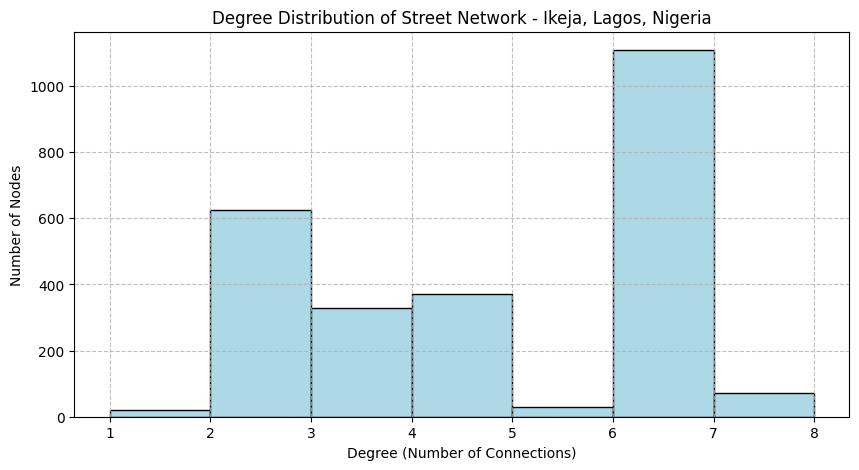

In [ ]:
# 7. Plot the degree distribution
plt.figure(figsize=(10,5))
plt.hist(degrees, bins=range(1, max(degrees)+1), color='lightblue', edgecolor='black')
plt.title("Degree Distribution of Street Network - Ikeja, Lagos, Nigeria")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Number of Nodes")
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()


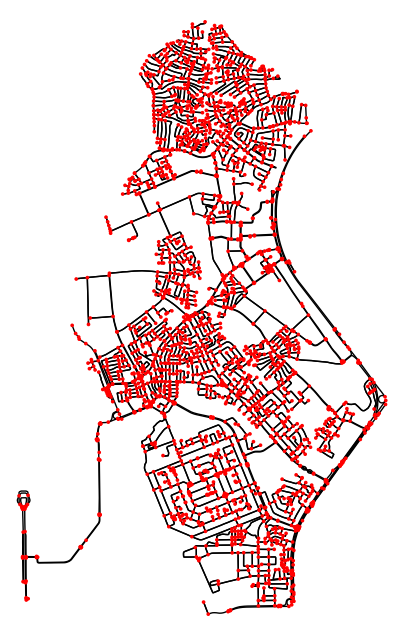

In [ ]:
# 8. Optional: Visualize the graph
fig, ax = ox.plot_graph(G, node_size=7, node_color='red', edge_color='black', bgcolor='white')

In [ ]:
# 9. Compute Closeness Centrality (corrected)
G_undirected = G.to_undirected()
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_sub = G_undirected.subgraph(largest_cc).copy()

closeness_centrality = nx.closeness_centrality(G_sub)

# Sort and display top 10 nodes
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print("\nTop 10 Nodes by Closeness Centrality:")
pprint(sorted_closeness[:10])

# Compute Closeness Centrality
print("\nCalculating closeness centrality...")
closeness_dict = nx.closeness_centrality(G)

# Convert the dictionary to a list for analysis
closeness_values = list(closeness_dict.values())

# Display basic statistics
print("\nCloseness Centrality Statistics:")
print(f"Number of nodes: {len(closeness_values)}")
print(f"Average closeness: {np.mean(closeness_values):.4f}")
print(f"Maximum closeness: {np.max(closeness_values):.4f}")
print(f"Minimum closeness: {np.min(closeness_values):.4f}")


Top 10 Nodes by Closeness Centrality:
[(1489194766, 0.04148177045236586),
 (1477869206, 0.04117191533298916),
 (1489219914, 0.04096439693088061),
 (1477755399, 0.04086600051242634),
 (1489219663, 0.04069331717506737),
 (1477755310, 0.040518226851263814),
 (1489219852, 0.040473887047404566),
 (5573446118, 0.04033379694019471),
 (1495582315, 0.04032360005056251),
 (5567268760, 0.040183913837626754)]

Calculating closeness centrality...

Closeness Centrality Statistics:
Number of nodes: 2553
Average closeness: 0.0226
Maximum closeness: 0.0331
Minimum closeness: 0.0000


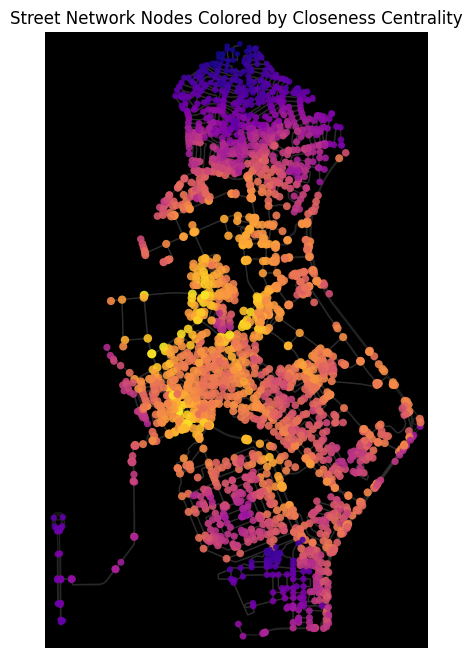

In [ ]:
# 10. Visualize nodes by closeness centrality
# Add closeness centrality as a node attribute
nx.set_node_attributes(G, closeness_centrality, name="closeness_centrality")

node_colors = ox.plot.get_node_colors_by_attr(G, "closeness_centrality", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_size=[v * 1000 for v in closeness_centrality.values()],
    node_color=node_colors,
    edge_color="#333333",
    bgcolor="k",
    node_alpha=0.9,
    edge_alpha=0.6,
    show=False,
    close=False,
)

plt.title("Street Network Nodes Colored by Closeness Centrality")
plt.show()

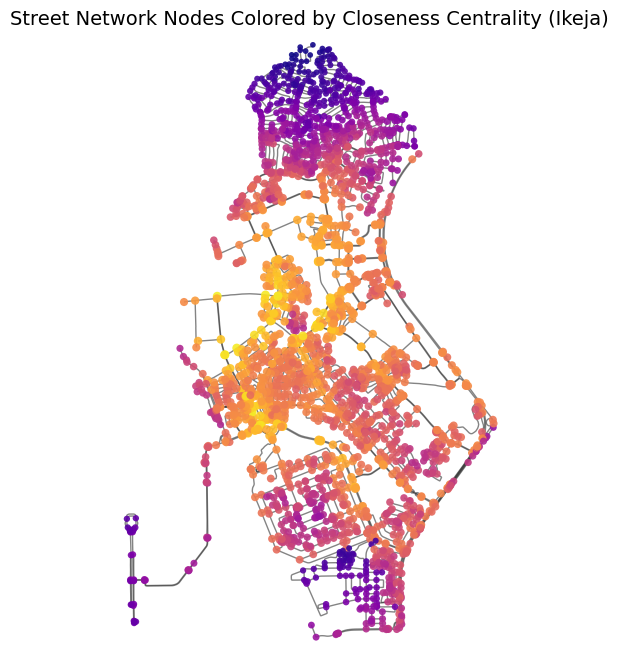

In [ ]:
# 10. Visualize nodes by closeness centrality (white background)
nx.set_node_attributes(G_sub, closeness_centrality, name="closeness_centrality")

node_colors = ox.plot.get_node_colors_by_attr(G_sub, "closeness_centrality", cmap="plasma")

fig, ax = ox.plot_graph(
    G_sub,
    node_size=[v * 1000 for v in closeness_centrality.values()],
    node_color=node_colors,
    edge_color="#333333",
    bgcolor="white",       # ✅ Changed background to white
    node_alpha=0.9,
    edge_alpha=0.6,
    show=False,
    close=False,
)

plt.title("Street Network Nodes Colored by Closeness Centrality (Ikeja)", fontsize=14)
plt.show()


In [ ]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Ikeja, Lagos, Nigeria"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(11950, 71)

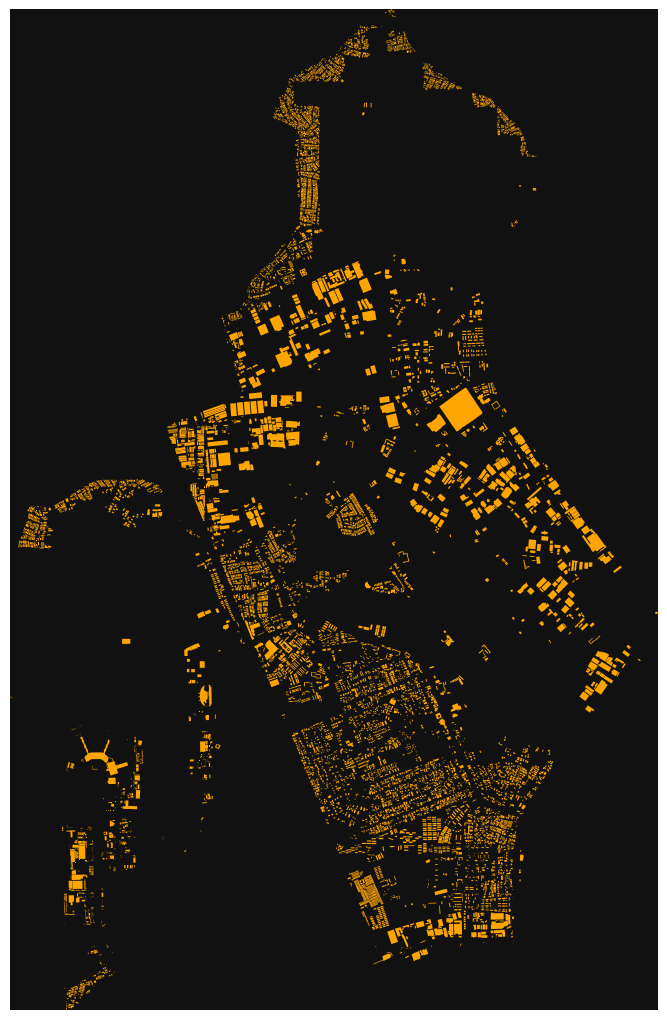

In [ ]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(13, 13))

In [ ]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"leisure": "park"}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(3, 3)

In [ ]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.features.features_from_place("Ikeja, Lagos, Nigeria", tags)
gdf.shape

(261, 92)

In [ ]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")

geometry amenity
element id                                                                   
node    2197600001                            POINT (3.34931 6.60636)    bank
        6124733445                             POINT (3.3655 6.64015)    bank
        6124733446                            POINT (3.36606 6.64027)    bank
        6124733447                            POINT (3.36775 6.64015)    bank
        6967294263                            POINT (3.36639 6.57183)    bank
        6992566358                            POINT (3.34608 6.61304)    bank
        6992566426                            POINT (3.34246 6.62493)    bank
        6992566427                            POINT (3.34293 6.62441)    bank
        7480505645                             POINT (3.34027 6.6314)    bank
        9653831274                            POINT (3.34269 6.59318)    bank
way     131672297   POLYGON ((3.36709 6.63977, 3.36724 6.63977, 3....    bank
        551464850   POLYGON ((3.35751 6.58404, 3.35754 6.58396, 3....    bank
        551464856   POLYGON ((3.35659 6.5849, 3.35663 6.58476, 3.3...    bank
        551464857   POLYGON ((3.35672 6.58463, 3.35678 6.58444, 3....    bank
        625093259   POLYGON ((3.35497 6.59699, 3.35481 6.59682, 3....    bank
        625602955   POLYGON ((3.35408 6.59728, 3.35416 6.59716, 3....    bank
        626246880   POLYGON ((3.35358 6.59881, 3.35376 6.59894, 3....    bank
        626246886   POLYGON ((3.35368 6.59851, 3.35428 6.5989, 3.3...    bank
        793453588   POLYGON ((3.35428 6.62652, 3.35429 6.62646, 3....    bank
        793453592   POLYGON ((3.35411 6.62744, 3.35409 6.62723, 3....    bank
        793453594   POLYGON ((3.35368 6.62745, 3.35365 6.62731, 3....    bank

In [ ]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

geometry  bus   highway public_transport
element id                                                                 
node    5649291344  POINT (3.35727 6.61541)  yes  bus_stop         platform
        5649291345   POINT (3.3569 6.61538)  yes  bus_stop         platform
        6291361174  POINT (3.37875 6.58741)  yes  bus_stop    stop_position
        6291361179  POINT (3.37848 6.58739)  yes  bus_stop    stop_position
        6871106823  POINT (3.36455 6.61799)  yes  bus_stop         platform

Attach features to nearest **nodes**

In [ ]:
# first create the graph and the features
place = "Ikeja, Lagos, Nigeria"
G = ox.graph.graph_from_place(place, network_type="drive")
features = ox.features.features_from_place(place, {"amenity": "parking"})

In [ ]:
# then attach your features to your graph's nearest nodes as attributes
feature_points = features.representative_point()
nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)
useful_tags = ["access", "parking", "surface", "capacity", "fee"]
# Filter useful_tags to only include columns that exist in the features DataFrame
existing_tags = [tag for tag in useful_tags if tag in features.columns]
for node, feature in zip(nn, features[existing_tags].to_dict(orient="records")):
    feature = {k: v for k, v in feature.items() if pd.notna(v)}
    G.nodes[node].update({"parking": feature})

In [ ]:
# model the street network
latlon = (6.606243, 3.346990)
G = ox.graph.graph_from_point(latlon, dist=1500, network_type="drive")

Create a fake set of **firms**

In [ ]:
# fake data: create n_firms randomly distributed across 3 firm centers
n_firms = 30
center_latlons = [(6.614139584335031, 3.358099608468264), (6.590482, 3.342493), (6.615030, 3.336174)]

In [ ]:
# randomly scatter the firms around the centers
np.random.seed(0)
scale = 0.001
size = int(n_firms / len(center_latlons))
firm_lats = []
firm_lons = []
for lat, lon in center_latlons:
    firm_lons.extend(np.random.normal(loc=lon, scale=scale, size=size))
    firm_lats.extend(np.random.normal(loc=lat, scale=scale, size=size))

firms = pd.DataFrame({"lat": firm_lats, "lon": firm_lons})
len(firms)

30

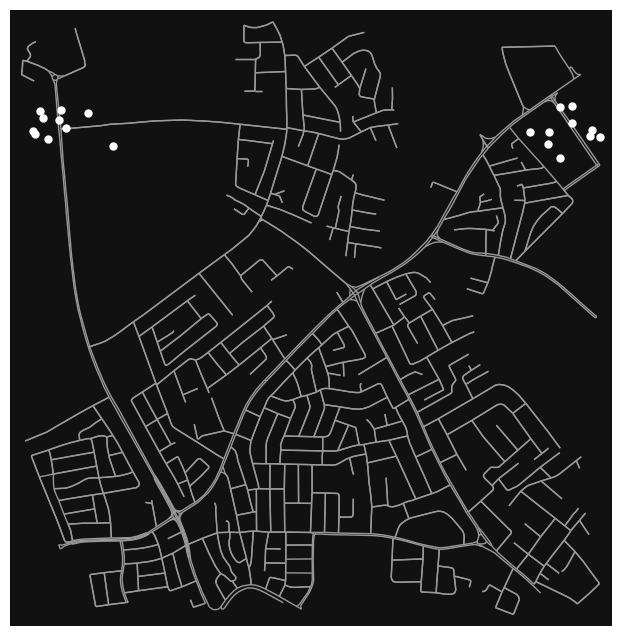

In [ ]:
# plot the firms and the points around which they cluster
fig, ax = ox.plot.plot_graph(G, node_color="#aaaaaa", node_size=0, show=False, close=True)
ax.scatter(x=firms["lon"], y=firms["lat"], c="w", marker=".", s=100, zorder=2)
fig.canvas.draw()
fig

**Regular spatial clustering with DBSCAN**

In [ ]:
# parameterize DBSCAN
eps = 300  # meters
minpts = 3  # smallest cluster size allowed

In [ ]:
# compute DBSCAN using great-circle distances
eps_rad = eps / 6371000.0  # meters to radians
db = DBSCAN(eps=eps_rad, min_samples=minpts, metric="haversine", algorithm="ball_tree")
firms["spatial_cluster"] = db.fit_predict(np.deg2rad(firms[["lat", "lon"]]))
len(firms["spatial_cluster"].unique())

3

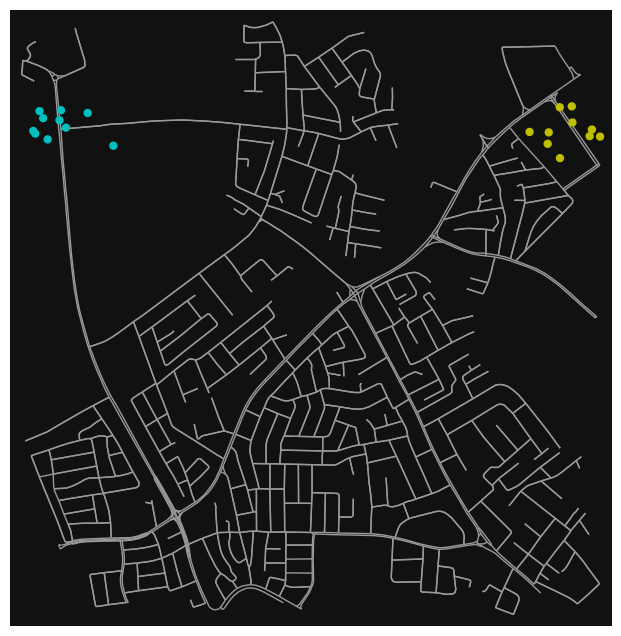

In [ ]:
# plot firms by cluster
color_map = {-1: "w", 0: "y", 1: "r", 2: "c", 3: "b"}
point_colors = [color_map[c] for c in firms["spatial_cluster"]]
fig, ax = ox.plot.plot_graph(G, node_size=0, show=False, close=True)
ax.scatter(x=firms["lon"], y=firms["lat"], c=point_colors, marker=".", s=100, zorder=2)
fig.canvas.draw()
fig

**Create network-constrained distance matrix**

In [ ]:
# attach nearest network node to each firm
firms["nn"] = ox.distance.nearest_nodes(G, X=firms["lon"], Y=firms["lat"])
len(firms["nn"])

30

In [ ]:
# get distances for each pair of nodes that have firms attached to them
nodes_unique = pd.Series(firms["nn"].unique())
nodes_unique.index = nodes_unique.values
len(nodes_unique)

11

In [ ]:
def network_distance_matrix(u, D, vs=nodes_unique):
    dists = (nx.dijkstra_path_length(D, source=u, target=v, weight="length") for v in vs)
    return pd.Series(dists, index=vs)


# create node-based distance matrix
# convert DiGraph for simpler faster distance matrix calculation
D = ox.convert.to_digraph(G, weight="length")

# Get the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(D), key=len)
D_scc = D.subgraph(largest_scc).copy()

# Filter nodes_unique to only include nodes within the largest SCC
nodes_unique_scc = nodes_unique[nodes_unique.isin(largest_scc)]

# Calculate the distance matrix using the subgraph
node_dm = nodes_unique_scc.apply(network_distance_matrix, D=D_scc, vs=nodes_unique_scc)
node_dm = node_dm.astype(int)
node_dm.size

81

**Make distance matrix sparse**

In [ ]:
node_dm[node_dm == 0] = 1
node_dm[node_dm > eps] = 0

In [ ]:
# Filter firms to include only those whose nearest node is in the largest SCC
firms_scc = firms[firms["nn"].isin(nodes_unique_scc)].copy()

# reindex node-based distance matrix to create network-based distance matrix using filtered firms
net_dm = node_dm.reindex(index=firms_scc["nn"], columns=firms_scc["nn"])
net_dm.size

529

In [ ]:
# convert network-based distance matrix to a sparse matrix
net_dm_sparse = sort_graph_by_row_values(csr_matrix(net_dm), warn_when_not_sorted=False)

**Cluster firms along the network**

In [ ]:
# use metric=precomputed to fit model to the sparse network-based distance matrix
db = DBSCAN(eps=eps, min_samples=minpts, metric="precomputed")
firms_scc["network_cluster"] = db.fit_predict(net_dm_sparse)
len(firms_scc["network_cluster"].unique())

7

/tmp/ipython-input-1560196126.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {cluster: plt.cm.get_cmap("tab10")(cluster) for cluster in unique_clusters}


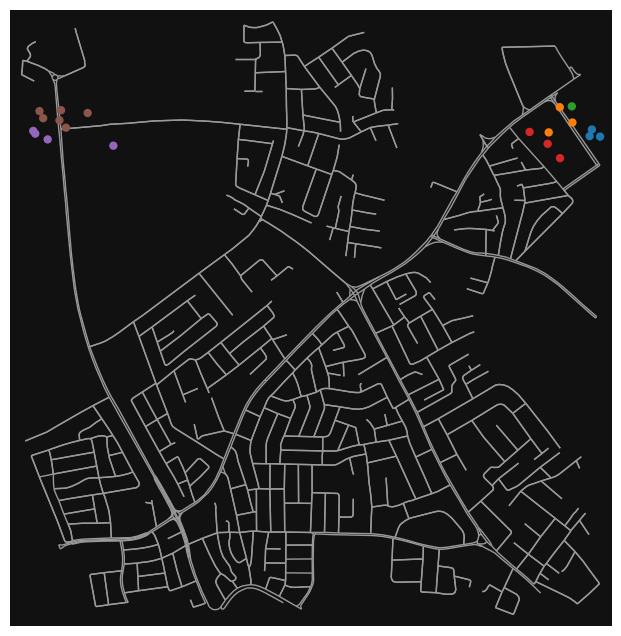

In [ ]:
# plot firms by cluster
# Get unique cluster labels from the network_cluster column
unique_clusters = firms_scc["network_cluster"].unique()

# Create a color map that includes all unique cluster labels
# You can add more colors as needed
color_map = {cluster: plt.cm.get_cmap("tab10")(cluster) for cluster in unique_clusters}
color_map[-1] = "w" # Assign white to noise points

point_colors = [color_map[c] for c in firms_scc["network_cluster"]]
ns = [50 if n in firms_scc["nn"].values else 0 for n in G.nodes()]
fig, ax = ox.plot.plot_graph(G, node_color="gray", node_size=0, show=False, close=True)
ax.scatter(x=firms_scc["lon"], y=firms_scc["lat"], c=point_colors, marker=".", s=100, zorder=3)
fig.canvas.draw()
fig

In [ ]:
# compare firms' spatial clusters to network-based clusters
firms_scc = firms_scc.reindex(columns=["lon", "lat", "nn", "spatial_cluster", "network_cluster"])
firms_scc.iloc[4:9]

,lon,lat,nn,spatial_cluster,network_cluster
4,3.359967,6.614583,1495688438,0,0
5,3.357122,6.614473,9399398424,0,3
6,3.359050,6.615634,1495688436,0,2
7,3.357948,6.613934,1495688630,0,3
8,3.357996,6.614453,1495688447,0,1


In [ ]:
pip install hypergraphx

In [ ]:
pip install -q hypergraphx@git+https://github.com/HGX-Team/hypergraphx

  Preparing metadata (setup.py) ... done


In [ ]:
import sys
sys.path.append("..")

from hypergraphx.generation.scale_free import scale_free_hypergraph
from hypergraphx.linalg import *
from hypergraphx.representations.projections import bipartite_projection, clique_projection
from hypergraphx.generation.random import *
from hypergraphx.readwrite.save import save_hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph